In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, f1_score, recall_score, precision_score

In [5]:
df = pd.read_csv("data/cleaned_data.csv")

In [6]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytimeevening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [7]:
df.columns.tolist()

['Marital_status',
 'Application_mode',
 'Application_order',
 'Course',
 'Daytimeevening_attendance',
 'Previous_qualification',
 'Previous_qualification_grade',
 'Nacionality',
 'Mothers_qualification',
 'Fathers_qualification',
 'Mothers_occupation',
 'Fathers_occupation',
 'Admission_grade',
 'Displaced',
 'Educational_special_needs',
 'Debtor',
 'Tuition_fees_up_to_date',
 'Gender',
 'Scholarship_holder',
 'Age_at_enrollment',
 'International',
 'Curricular_units_1st_sem_credited',
 'Curricular_units_1st_sem_enrolled',
 'Curricular_units_1st_sem_evaluations',
 'Curricular_units_1st_sem_approved',
 'Curricular_units_1st_sem_grade',
 'Curricular_units_1st_sem_without_evaluations',
 'Curricular_units_2nd_sem_credited',
 'Curricular_units_2nd_sem_enrolled',
 'Curricular_units_2nd_sem_evaluations',
 'Curricular_units_2nd_sem_approved',
 'Curricular_units_2nd_sem_grade',
 'Curricular_units_2nd_sem_without_evaluations',
 'Unemployment_rate',
 'Inflation_rate',
 'GDP',
 'Target']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytimeevening_attendance                     4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [9]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytimeevening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


### DATA PREPROCESSING

In [10]:
#Renaming the column 'Nacionality' to 'Nationality' and 'Target' to 'Student Status'

df.rename(columns = {'Nacionality':'Nationality'}, inplace = True)
df.rename(columns = {'Daytimeevening attendance':'Daytime/evening_attendance'}, inplace = True)

In [11]:
df.shape

(4424, 37)

In [12]:
df.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytimeevening_attendance                       0
Previous_qualification                          0
Previous_qualification_grade                    0
Nationality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [13]:
# Checking for duplicate values
duplicate = df[df.duplicated()]
print("Duplicate Rows :")

# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Marital_status,Application_mode,Application_order,Course,Daytimeevening_attendance,Previous_qualification,Previous_qualification_grade,Nationality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Target


There is no duplicate rows present in the dataset.

### EDA

/var/folders/yz/ts8pxly14sgfrhgqrmfv3qq80000gp/T/ipykernel_16015/3489036411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y='Admission_grade', data=df, palette="Set2")


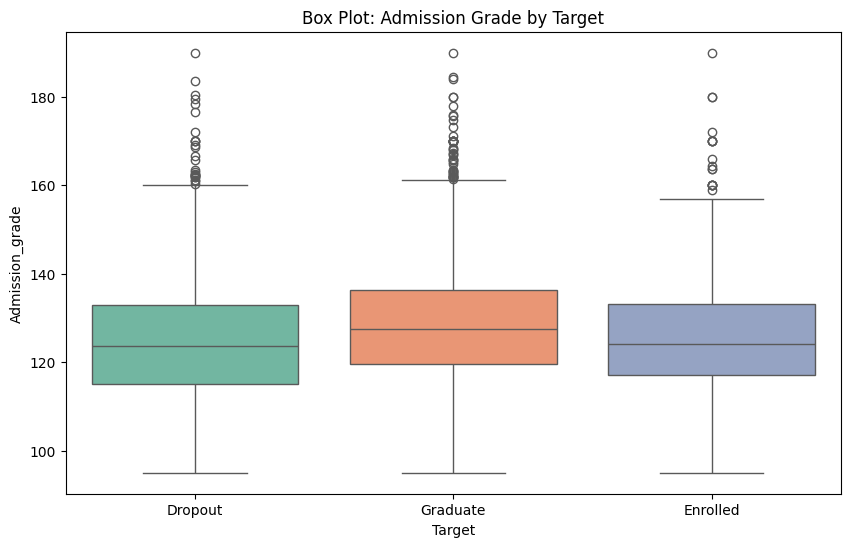

/var/folders/yz/ts8pxly14sgfrhgqrmfv3qq80000gp/T/ipykernel_16015/3489036411.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y='Curricular_units_1st_sem_grade', data=df, palette="Set3")


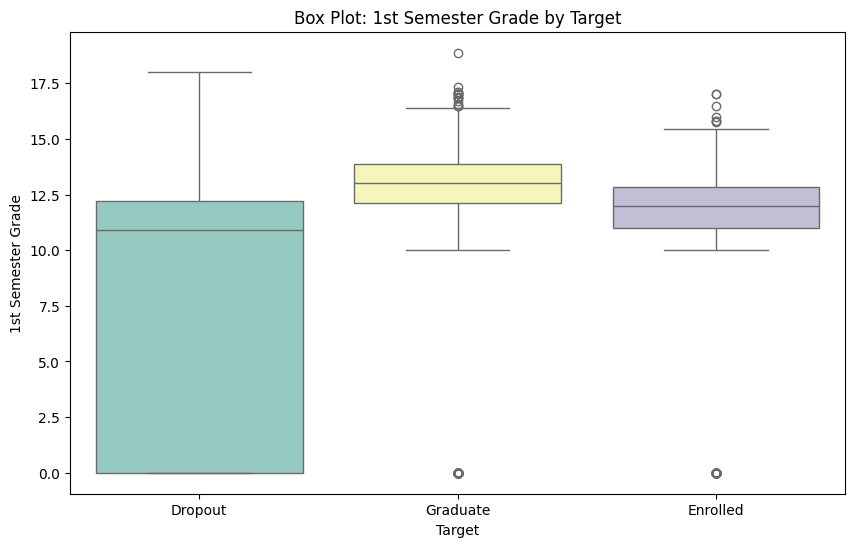

In [14]:
# Box plot for Admission Grade
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Admission_grade', data=df, palette="Set2")
plt.title("Box Plot: Admission Grade by Target")
plt.xlabel("Target")
plt.ylabel("Admission_grade")
plt.show()

# Box plot for 1st Semester Grade
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Curricular_units_1st_sem_grade', data=df, palette="Set3")
plt.title("Box Plot: 1st Semester Grade by Target")
plt.xlabel("Target")
plt.ylabel("1st Semester Grade")
plt.show()


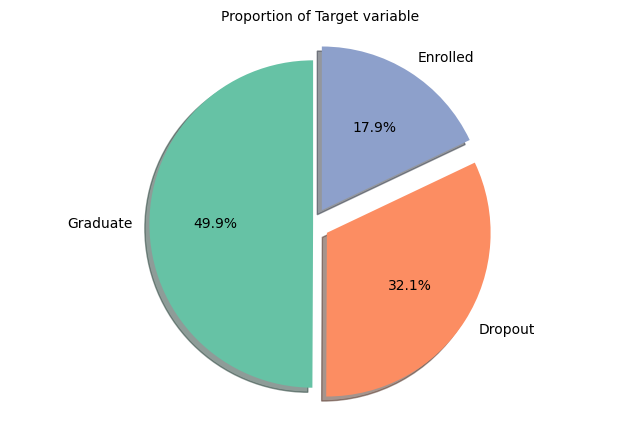

In [15]:
# Pie chart to display the amount (percentage) distribution of the Target Variable

labels = 'Graduate', 'Dropout', 'Enrolled'
sizes = [df.Target[df['Target']=='Graduate'].count(), df.Target[df['Target']=='Dropout'].count(), df.Target[df['Target']=='Enrolled'].count()]
explode = (0, 0.1, 0.1)
colors = ['#66c2a5', '#fc8d62', '#8da0cb']  # Custom colors for the pie chart
fig1, ax1 = plt.subplots(figsize=(8, 5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
ax1.axis('equal')
plt.title("Proportion of Target variable", size = 10)
plt.show()


The pie chart represents the breakdown of students based on their academic outcomes. It highlights that about one-third of the students did not continue their studies, pointing to a dropout rate that could benefit from further investigation and support measures.

Furthermore, the chart indicates that nearly 50% of the students have completed their graduation, while around 32% have dropped out, and approximately 17% are pursuing other programs. This suggests that half of the student population has achieved academic success through graduation.

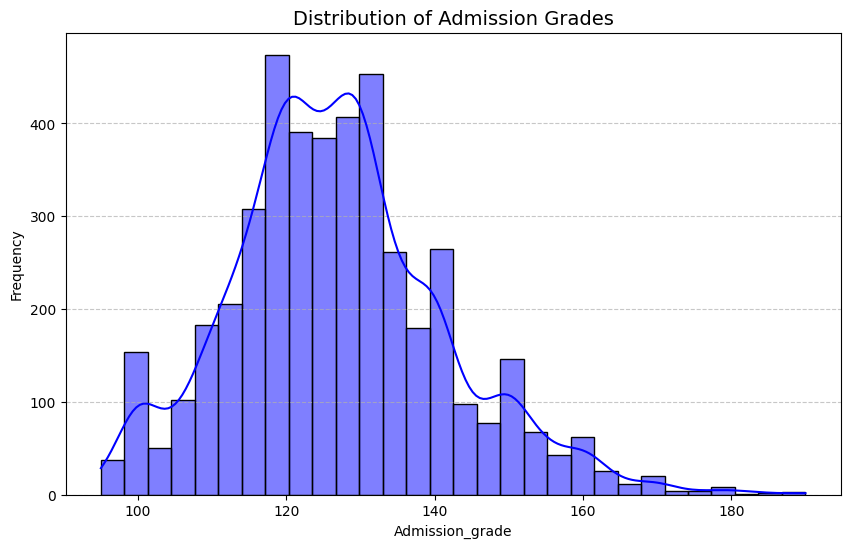

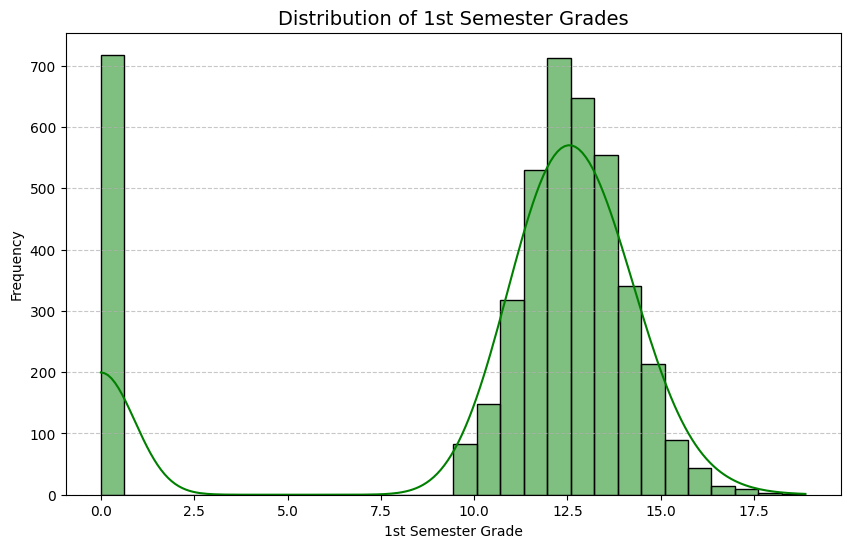

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Admission Grades
plt.figure(figsize=(10, 6))
sns.histplot(df['Admission_grade'], bins=30, kde=True, color='blue')
plt.title('Distribution of Admission Grades', fontsize=14)
plt.xlabel('Admission_grade')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Histogram for 1st Semester Grades
plt.figure(figsize=(10, 6))
sns.histplot(df['Curricular_units_1st_sem_grade'], bins=30, kde=True, color='green')
plt.title('Distribution of 1st Semester Grades', fontsize=14)
plt.xlabel('1st Semester Grade')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


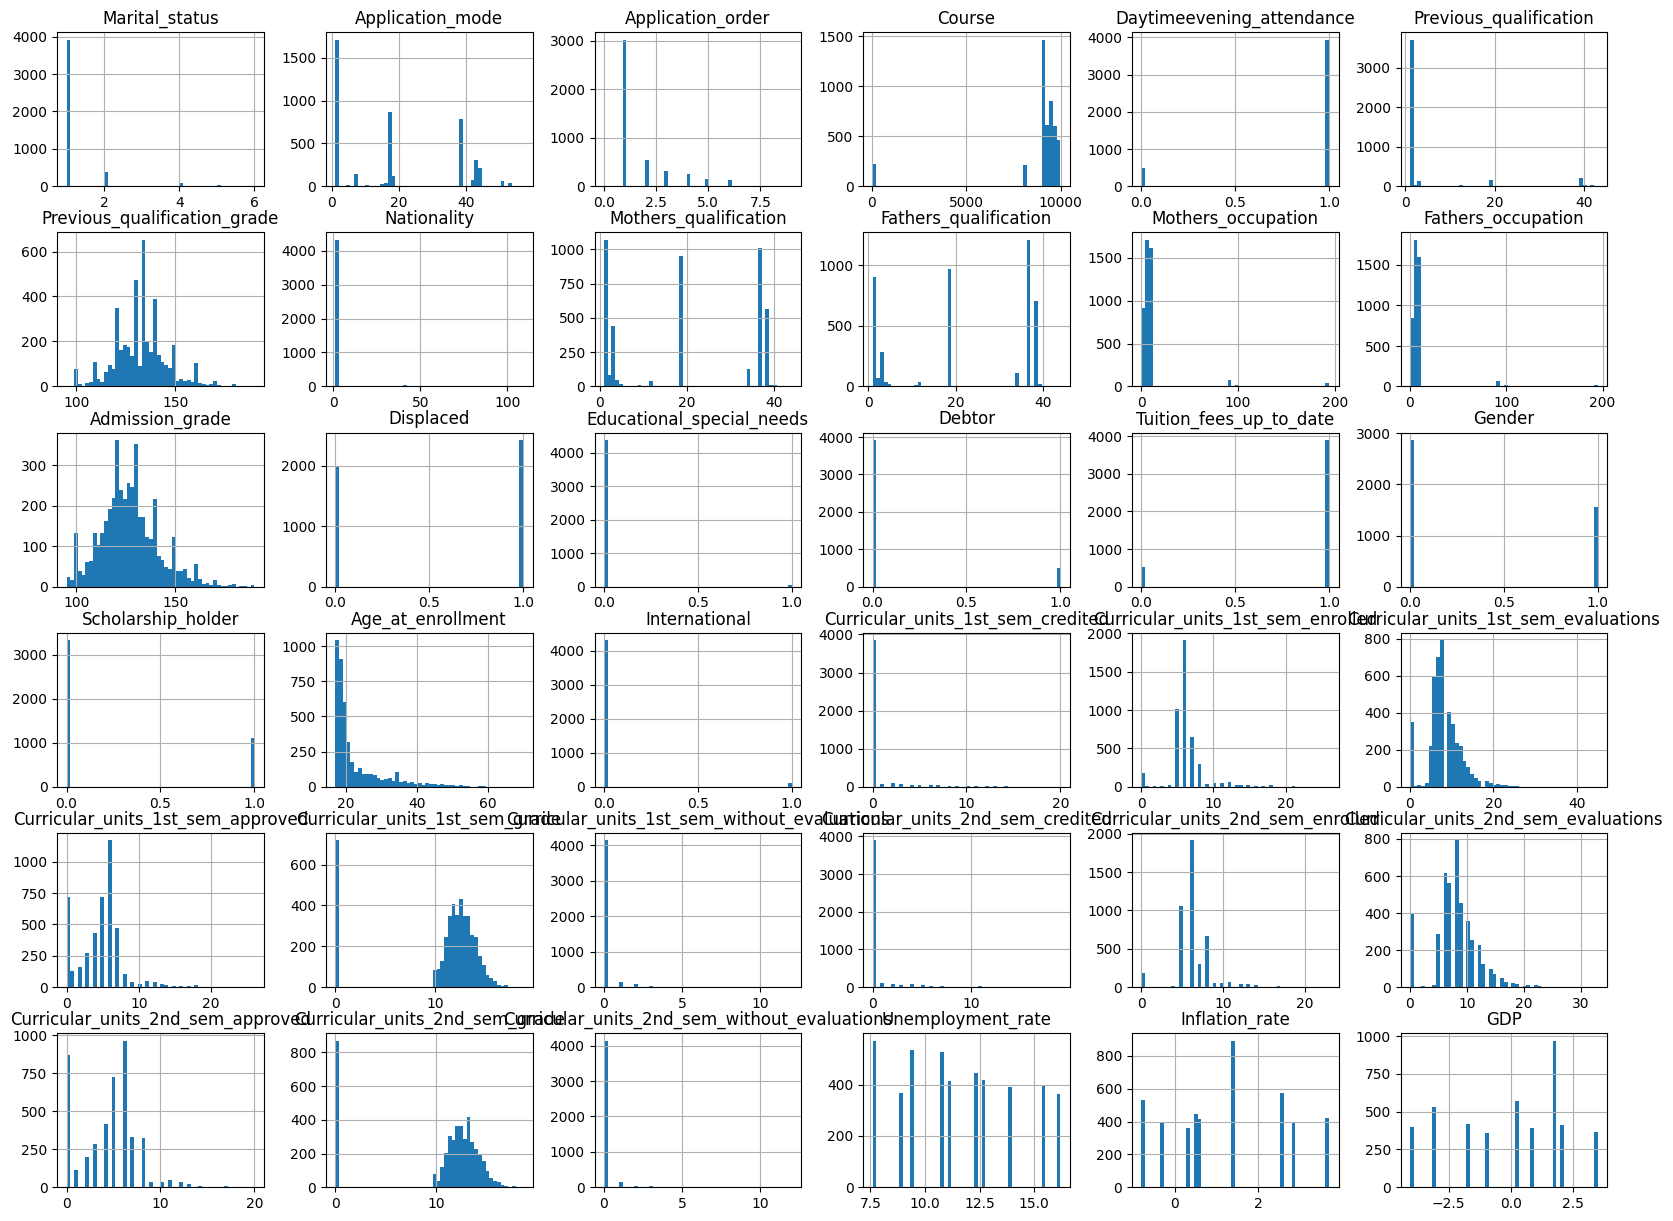

In [17]:
df[df.columns].hist(bins=50, figsize=(20,15))
plt.savefig("General Explore.png") # save as png

The figure offers a clear overview of numerical features, their distributions, and common values, suggesting the need to explore feature correlations next.

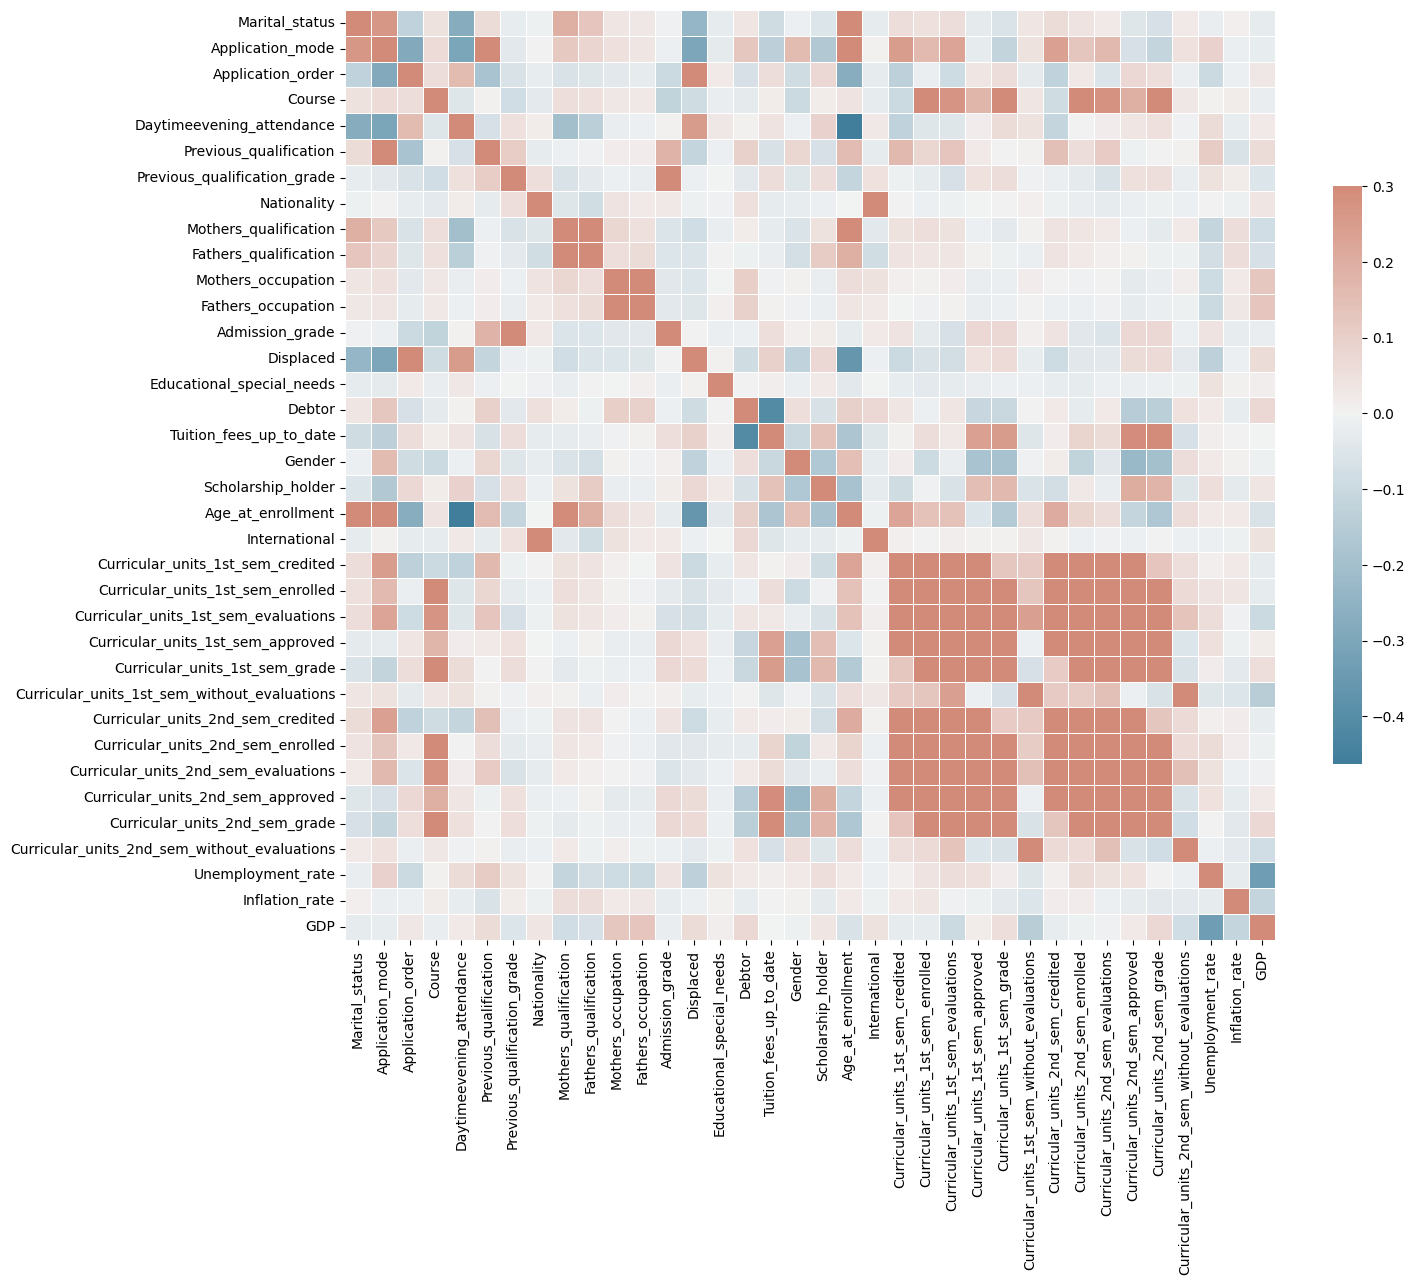

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plotting a correlation matrix
f = plt.figure(figsize=(15, 15))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(numeric_df.corr(), annot=False, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig("Correlation.png")  # save as png

The correlation matrix shows that most features are strongly positively correlated (bright orange), a few are strongly negatively correlated (blue), and only a small number have weak positive or negative correlations.

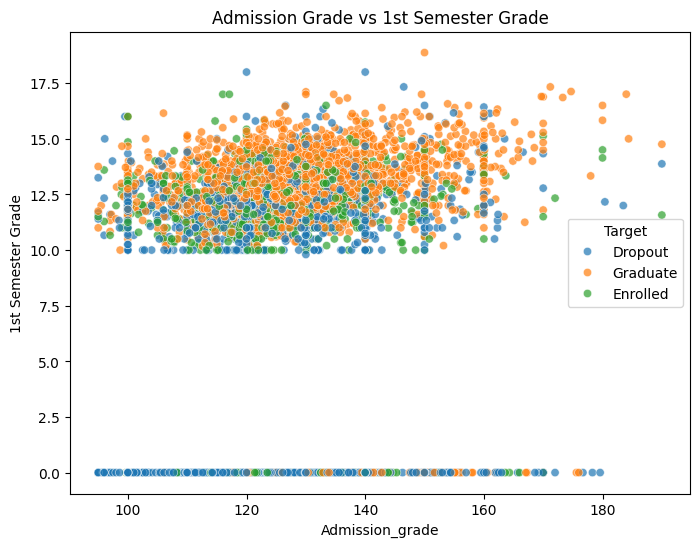

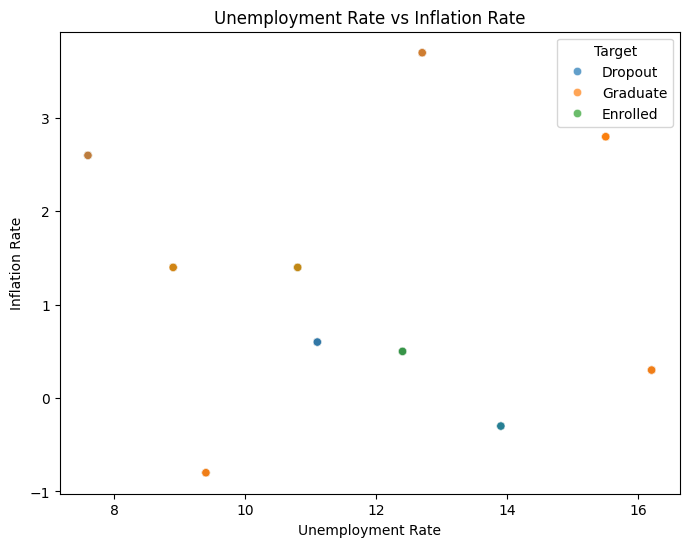

In [19]:
# Scatter plot for Admission Grade vs 1st Semester Grade
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Admission_grade', y='Curricular_units_1st_sem_grade', hue='Target', data=df, alpha=0.7)
plt.title("Admission Grade vs 1st Semester Grade")
plt.xlabel("Admission_grade")
plt.ylabel("1st Semester Grade")
plt.legend(title="Target")
plt.show()

# Scatter plot for Unemployment Rate vs Inflation Rate
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Unemployment_rate', y='Inflation_rate', hue='Target', data=df, alpha=0.7)
plt.title("Unemployment Rate vs Inflation Rate")
plt.xlabel("Unemployment Rate")
plt.ylabel("Inflation Rate")
plt.legend(title="Target")
plt.show()


<Axes: xlabel='Unemployment_rate', ylabel='Count'>

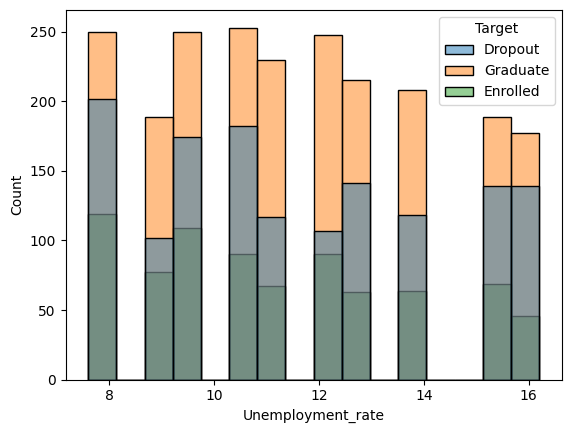

In [20]:
sns.histplot(x='Unemployment_rate',data=df,hue='Target')

Higher unemployment rates reduce the likelihood of students dropping out, as increased competition in the job market encourages individuals to earn a degree to enhance their employability.

<Axes: xlabel='Inflation_rate', ylabel='Count'>

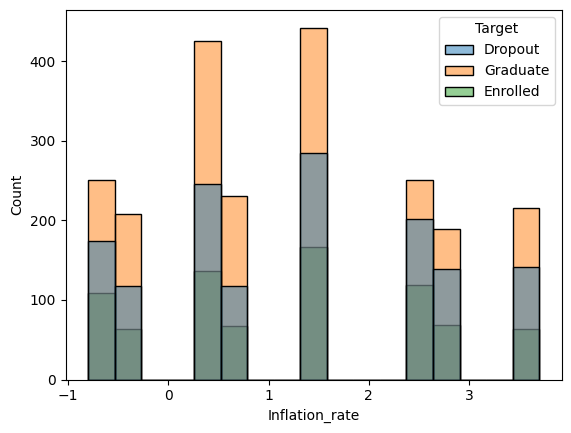

In [21]:
sns.histplot(x='Inflation_rate',data=df,hue='Target')

### Visualization of Categorical data

In [22]:
print(df.columns)

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytimeevening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nationality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_with

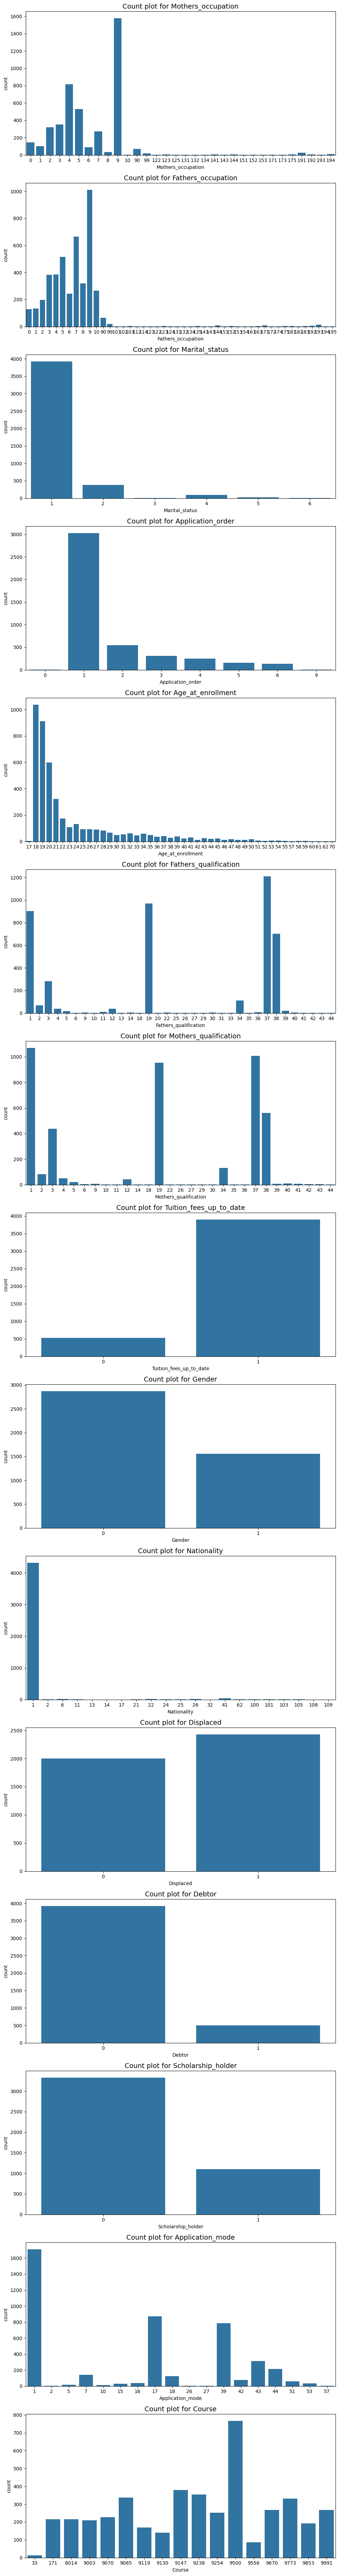

In [24]:
# Define the column list using exact names from your print(df.columns)
cols_ = [
    "Mothers_occupation",
    "Fathers_occupation",
    "Marital_status",
    "Application_order",
    "Age_at_enrollment",
    "Fathers_qualification",
    "Mothers_qualification",
    "Tuition_fees_up_to_date",
    "Gender",
    "Nationality",
    "Displaced",
    "Debtor",
    "Scholarship_holder",
    "Application_mode",
    "Course"
]

# Create subplots dynamically based on the number of columns
fig, axes = plt.subplots(len(cols_), 1, figsize=(10, 5 * len(cols_)))

# Generate count plots for each column
for ind, col in enumerate(cols_):
    if col not in df.columns:
        print(f"Column not found: {col}")  # Debug missing columns
    else:
        sns.countplot(x=col, data=df, ax=axes[ind])
        axes[ind].set_title(f"Count plot for {col}", fontsize=14)

plt.tight_layout()
plt.show()

### Insights
1. The majority of mothers are unskilled workers, followed by administrative staff, safety workers, and sellers.
2. Most fathers are unskilled workers, followed by skilled industrial workers, safety workers, security staff, and sellers.
3. Over 90% of the students in the dataset are single.
4. The majority of students enroll at the ages of 18, 19, and 20.
5. Most parents have a basic level of education, typically between class 5 and class 12.
6. Over 90% of students pay their tuition fees on time.
7. More than 60% of the students in this group are female.
8. Nearly all students in this dataset are Portuguese.
9. Most students are not scholarship holders.
10. The majority of students enrolled through the first phase of the application process, followed by the second phase.
11. Nursing is the most popular course among students, followed by management, social service, journalism, and communication courses.


## Inter-correlation plot between the top 10 features based on correlation.

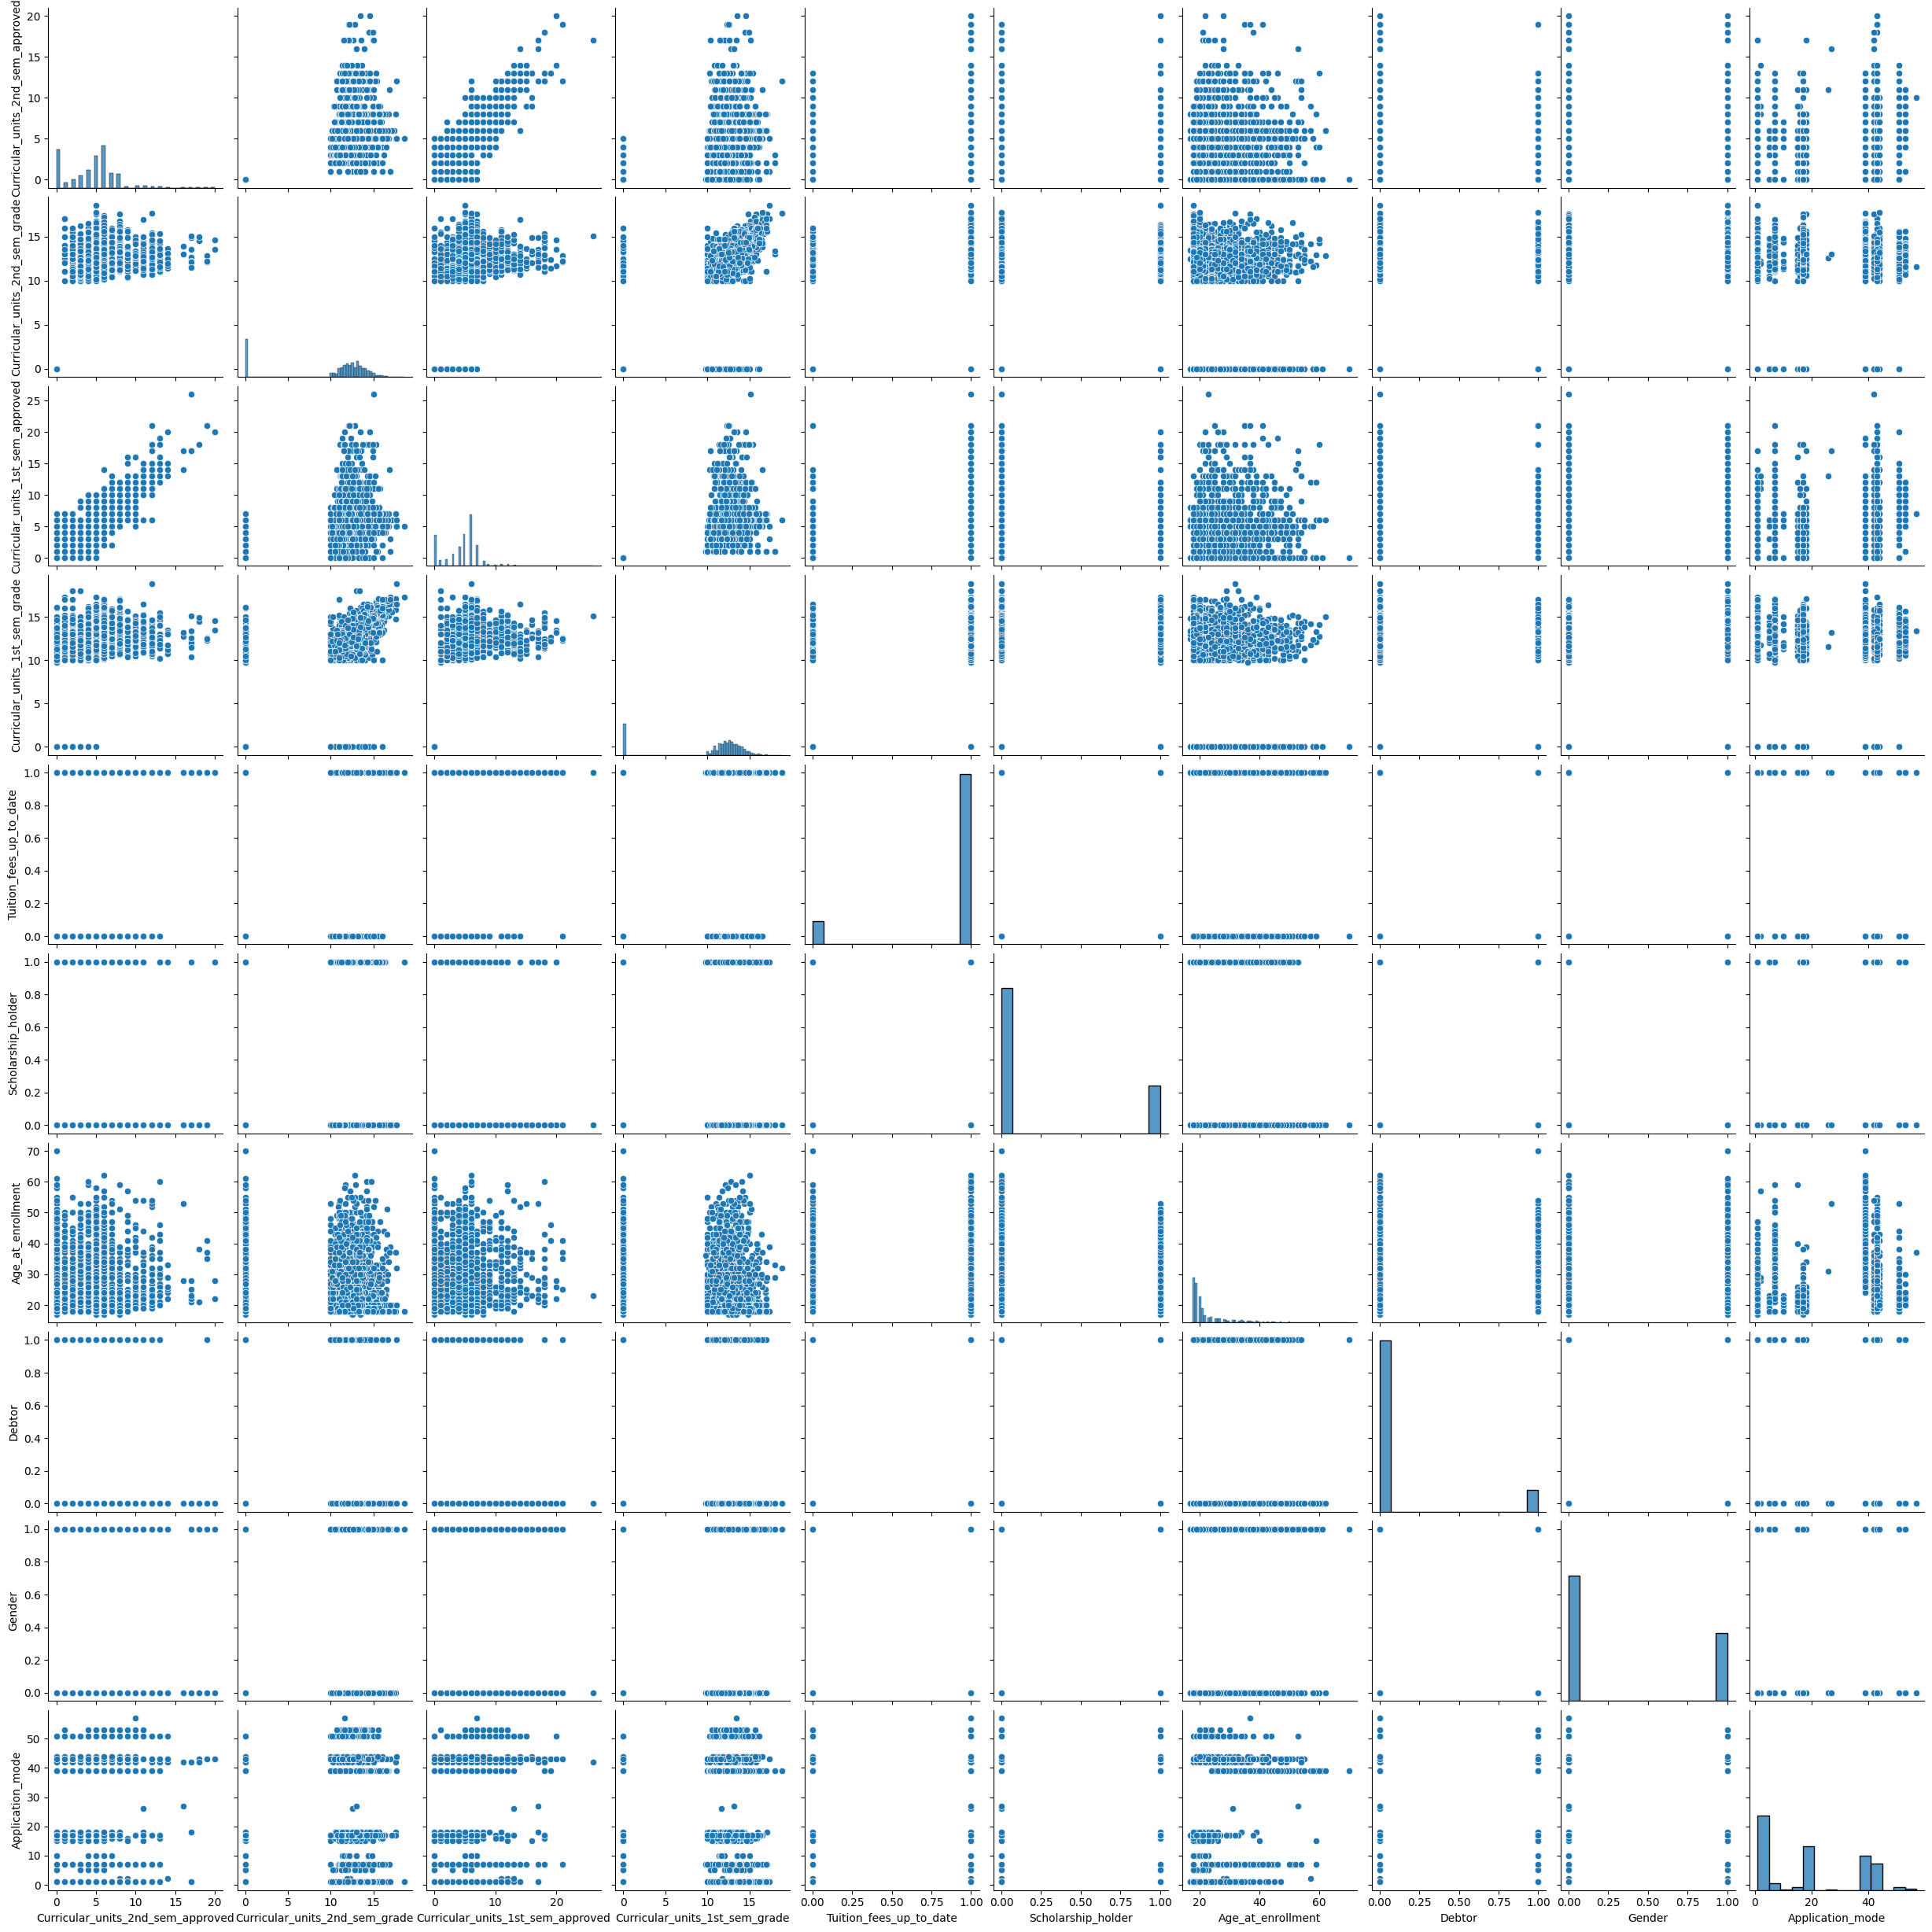

In [25]:
# Ensure the Target column is numeric if it makes sense to do so
# For example, map categorical values to numbers if applicable
df['Target'] = df['Target'].map({'Dropout': 0, 'Enrolled': 1, 'Graduate': 2})  # Adjust mapping as needed

# Select numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Recalculate the correlation matrix with numeric columns only
top_10_correlated_columns = numeric_df.corr()['Target'].abs().sort_values(ascending=False).index[1:11]

# Generate pairplot for top 10 correlated columns
sns.pairplot(df, vars=top_10_correlated_columns)
plt.show()

# Class Imbalancing

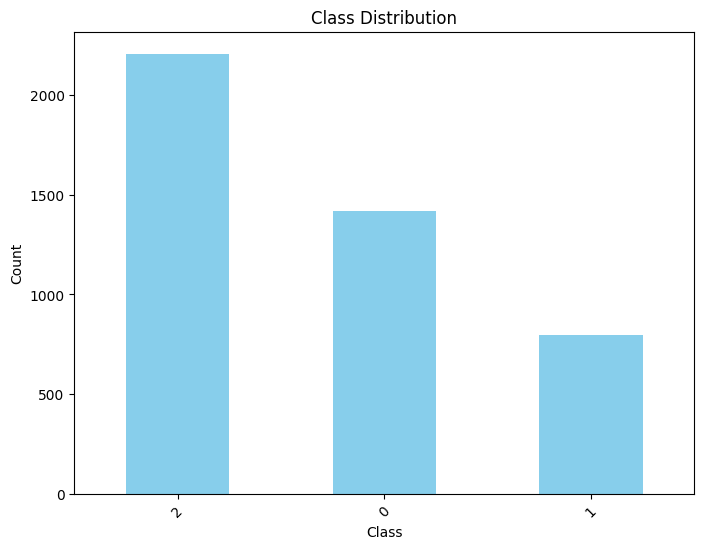

Class Distribution:
Target
2    2209
0    1421
1     794
Name: count, dtype: int64


In [26]:
target_column = 'Target'

# Count the occurrences of each class
class_counts = df[target_column].value_counts()

# Plotting the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Display class counts
print("Class Distribution:")
print(class_counts)

### Train Test Split

In [27]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(df.drop('Target',axis=1), df['Target'], test_size=0.2, random_state=101)

### Feature selection

In [28]:
# Feature extraction: Filter-based method (SelectKBest with ANOVA F-value)
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=30)  # Select top 10 features
X_train_filtered = selector.fit_transform(X_train1, y_train1)
X_test_filtered = selector.transform(X_test1)

In [29]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Ensure the original data is properly defined
X = df.drop('Target', axis=1)  # Features
y = df['Target']  # Target variable

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verify the resampled data
print("X_resampled shape:", X_resampled.shape)
print("y_resampled shape:", y_resampled.shape)

# Convert X_resampled back to DataFrame for SelectKBest
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)

# Apply SelectKBest with ANOVA F-values
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X_resampled_df, y_resampled)

# Get scores for each feature
feature_scores = pd.DataFrame({'Feature': X_resampled_df.columns, 'Score': selector.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Display top features
print("Selected Features:\n", feature_scores.head(10))


X_resampled shape: (6627, 36)
y_resampled shape: (6627,)
Selected Features:
                                  Feature        Score
30     Curricular_units_2nd_sem_approved  2110.252532
31        Curricular_units_2nd_sem_grade  1570.871573
24     Curricular_units_1st_sem_approved  1356.229084
25        Curricular_units_1st_sem_grade   973.411421
16               Tuition_fees_up_to_date   869.495264
18                    Scholarship_holder   536.476097
19                     Age_at_enrollment   230.892814
29  Curricular_units_2nd_sem_evaluations   173.412284
28     Curricular_units_2nd_sem_enrolled   149.923929
1                       Application_mode   142.207628


In [30]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=10)  # Keep 10 components
X_pca = pca.fit_transform(X_resampled)

# Explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [9.99321750e-01 3.35574965e-04 9.28473815e-05 7.53442698e-05
 6.16357714e-05 2.41911928e-05 1.82901156e-05 1.55603241e-05
 1.37705906e-05 1.26310822e-05]


## Class Imbalance overSampling

In [31]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


# Oversampling
oversample = RandomOverSampler(sampling_strategy='all')
X_resampled, y_resampled = oversample.fit_resample(X_train1, y_train1)

In [32]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)

# Class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_resampled))


Class distribution after SMOTE: Counter({2: 1750, 1: 1750, 0: 1750})


In [33]:
import pandas as pd

# Assuming X_train_resampled and y_train_resampled are your resampled features and target variable arrays
# Convert resampled arrays to DataFrames
X_train_resampled_df = pd.DataFrame(X_resampled, columns=X_train1.columns)
y_train_resampled_df = pd.DataFrame(y_resampled, columns=['Target'])

# Map numeric values back to their original labels
label_mapping = {0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}  # Adjust the mapping if needed
y_train_resampled_df['Target'] = y_train_resampled_df['Target'].map(label_mapping)

# Combine features and target variable into a single DataFrame
df_resampled = pd.concat([X_train_resampled_df, y_train_resampled_df], axis=1)

# Display the resampled DataFrame
print(df_resampled)

      Marital_status  Application_mode  Application_order  Course  \
0                  1                17                  1    9238   
1                  2                39                  1    9991   
2                  1                39                  1    9500   
3                  1                 1                  4    9070   
4                  1                 1                  1    9500   
...              ...               ...                ...     ...   
5245               1                 1                  3    9254   
5246               1                17                  2     171   
5247               1                 1                  2    9147   
5248               1                 1                  3    9070   
5249               1                17                  3    9085   

      Daytimeevening_attendance  Previous_qualification  \
0                             1                       1   
1                             0                      

In [34]:
df_resampled.columns.tolist()

['Marital_status',
 'Application_mode',
 'Application_order',
 'Course',
 'Daytimeevening_attendance',
 'Previous_qualification',
 'Previous_qualification_grade',
 'Nationality',
 'Mothers_qualification',
 'Fathers_qualification',
 'Mothers_occupation',
 'Fathers_occupation',
 'Admission_grade',
 'Displaced',
 'Educational_special_needs',
 'Debtor',
 'Tuition_fees_up_to_date',
 'Gender',
 'Scholarship_holder',
 'Age_at_enrollment',
 'International',
 'Curricular_units_1st_sem_credited',
 'Curricular_units_1st_sem_enrolled',
 'Curricular_units_1st_sem_evaluations',
 'Curricular_units_1st_sem_approved',
 'Curricular_units_1st_sem_grade',
 'Curricular_units_1st_sem_without_evaluations',
 'Curricular_units_2nd_sem_credited',
 'Curricular_units_2nd_sem_enrolled',
 'Curricular_units_2nd_sem_evaluations',
 'Curricular_units_2nd_sem_approved',
 'Curricular_units_2nd_sem_grade',
 'Curricular_units_2nd_sem_without_evaluations',
 'Unemployment_rate',
 'Inflation_rate',
 'GDP',
 'Target']

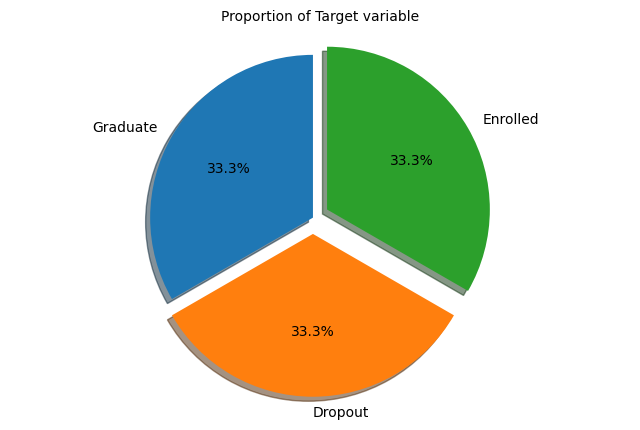

In [35]:
import matplotlib.pyplot as plt

# Assuming df_resampled is your DataFrame after oversampling
labels = 'Graduate', 'Dropout', 'Enrolled'
sizes = [df_resampled[df_resampled['Target'] == 'Graduate'].shape[0],
         df_resampled[df_resampled['Target'] == 'Dropout'].shape[0],
         df_resampled[df_resampled['Target'] == 'Enrolled'].shape[0]]

explode = (0, 0.1, 0.1)
fig1, ax1 = plt.subplots(figsize=(8, 5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of Target variable", size=10)
plt.show()


In [36]:
X_train, X_test, y_train, y_test = train_test_split(df_resampled.drop('Target',axis=1), df_resampled['Target'], test_size=0.2, random_state=101)

In [37]:
from sklearn.model_selection import train_test_split

# Split data after balancing
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("Balanced Data Split Sizes - Train:", X_train_balanced.shape, ", Test:", X_test_balanced.shape)

Balanced Data Split Sizes - Train: (4200, 36) , Test: (1050, 36)


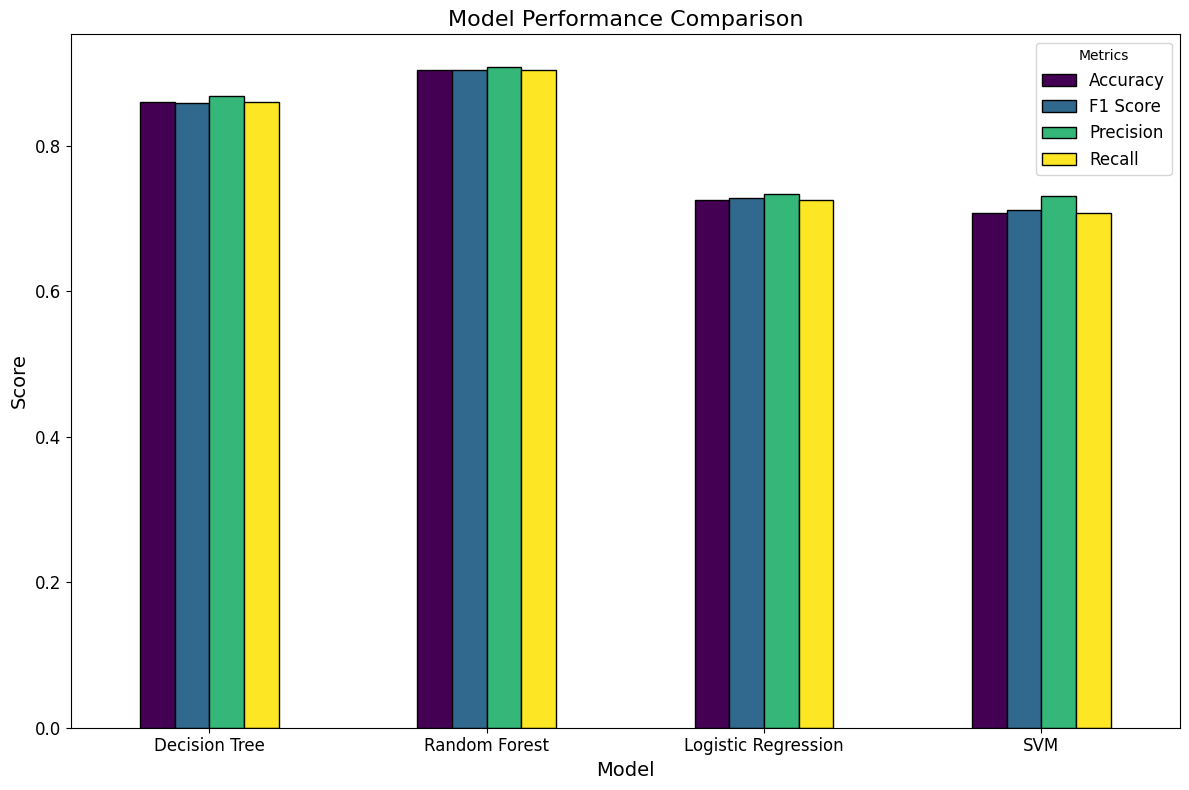

In [38]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pandas as pd

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
    "SVM": SVC(kernel='linear', probability=True, random_state=42)
}

# Scale the data (necessary for Logistic Regression and SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test_balanced)

# Train and evaluate models
results = []
for name, model in models.items():
    if name in ["Logistic Regression", "SVM"]:
        # Use scaled data for Logistic Regression and SVM
        model.fit(X_train_scaled, y_train_balanced)
        y_pred = model.predict(X_test_scaled)
    else:
        # Use raw data for Decision Tree and Random Forest
        model.fit(X_train_balanced, y_train_balanced)
        y_pred = model.predict(X_test_balanced)

    # Collect metrics
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test_balanced, y_pred),
        'F1 Score': f1_score(y_test_balanced, y_pred, average='weighted'),
        'Precision': precision_score(y_test_balanced, y_pred, average='weighted'),
        'Recall': recall_score(y_test_balanced, y_pred, average='weighted')
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plot performance metrics
ax = results_df.set_index('Model').plot(kind='bar', figsize=(12, 8), colormap='viridis', edgecolor='black')
plt.title("Model Performance Comparison", fontsize=16)
plt.ylabel("Score", fontsize=14)
plt.xlabel("Model", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="best", title="Metrics", fontsize=12)  # Adjusted loc to "best"
plt.tight_layout()
plt.show()

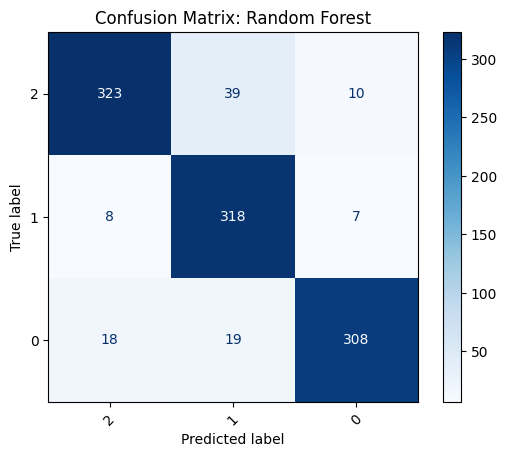

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix for Random Forest
best_model = models["Random Forest"]
y_pred_best = best_model.predict(X_test_balanced)

cm = confusion_matrix(y_test_balanced, y_pred_best, labels=y_test_balanced.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_test_balanced.unique())
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix: Random Forest")
plt.show()

In [40]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation for Random Forest
cv_scores = cross_val_score(best_model, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.87738095 0.87380952 0.88571429 0.87738095 0.88809524]
Mean Accuracy: 0.8804761904761904


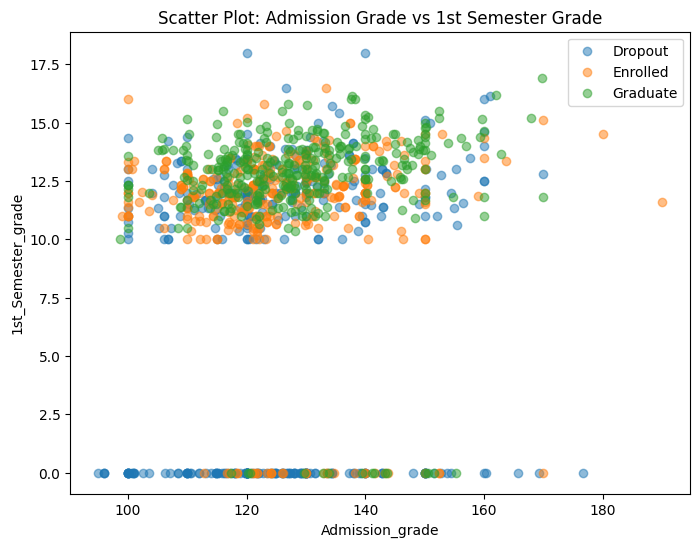

In [41]:
import matplotlib.pyplot as plt

# Scatter plot: Admission Grade vs. Target
plt.figure(figsize=(8, 6))
for target in y_test.unique():
    plt.scatter(X_test['Admission_grade'][y_test == target], X_test['Curricular_units_1st_sem_grade'][y_test == target], label=target, alpha=0.5)
    
plt.xlabel('Admission_grade')
plt.ylabel('1st_Semester_grade')
plt.title('Scatter Plot: Admission Grade vs 1st Semester Grade')
plt.legend()
plt.show()

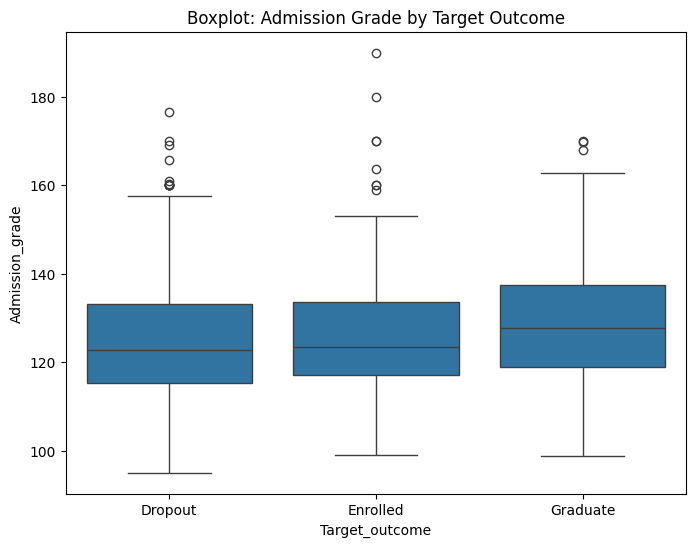

In [42]:
import seaborn as sns

# Boxplot for Admission Grade
plt.figure(figsize=(8, 6))
sns.boxplot(x=y_test, y=X_test['Admission_grade'])
plt.title('Boxplot: Admission Grade by Target Outcome')
plt.xlabel('Target_outcome')
plt.ylabel('Admission_grade')
plt.show()

In [43]:
from scipy.stats import zscore

# Calculate Z-scores for 'Admission grade'
z_scores = zscore(X_test['Admission_grade'])

# Identify outliers (z-score > 3 or < -3)
outliers = X_test[(z_scores > 3) | (z_scores < -3)]
print("Outliers in Admission Grade:\n", outliers)

Outliers in Admission Grade:
       Marital_status  Application_mode  Application_order  Course  \
4718               1                43                  1    9085   
4300               1                44                  1    9254   
2725               1                15                  1    9500   
4031               1                 1                  1     171   
1648               1                 7                  1    9119   
2423               3                39                  1    9991   
488                2                39                  1    9500   

      Daytimeevening_attendance  Previous_qualification  \
4718                          1                       1   
4300                          1                      39   
2725                          1                       1   
4031                          1                       1   
1648                          1                       4   
2423                          0                       1   
488 

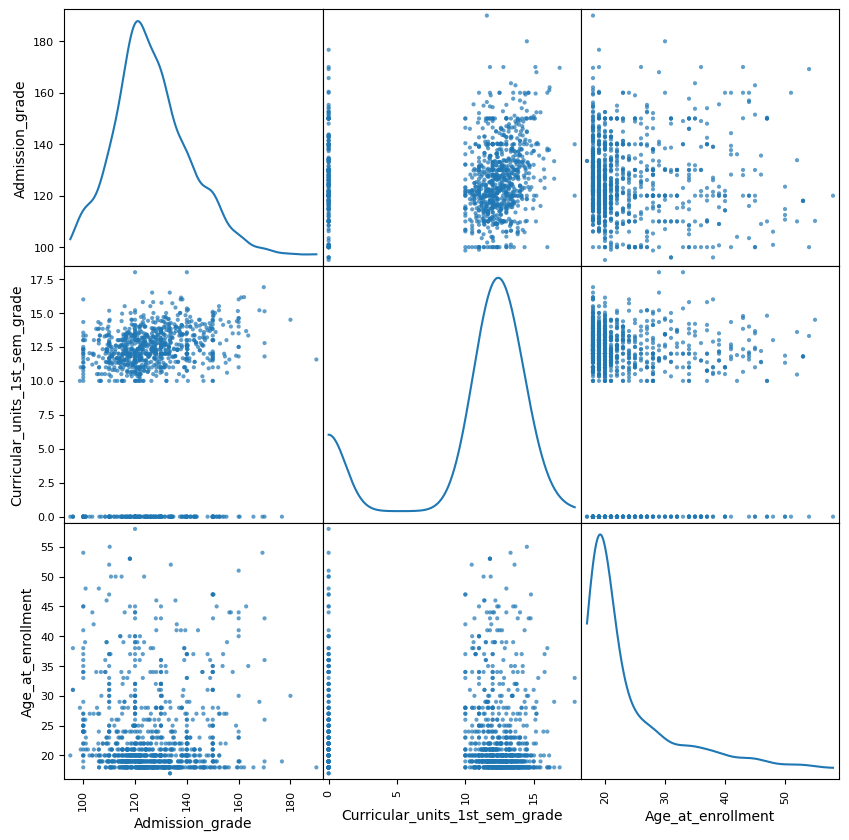

In [44]:
from pandas.plotting import scatter_matrix

# Scatter matrix for a subset of features
subset_features = ['Admission_grade', 'Curricular_units_1st_sem_grade', 'Age_at_enrollment']
scatter_matrix(X_test[subset_features], figsize=(10, 10), alpha=0.7, diagonal='kde')
plt.show()

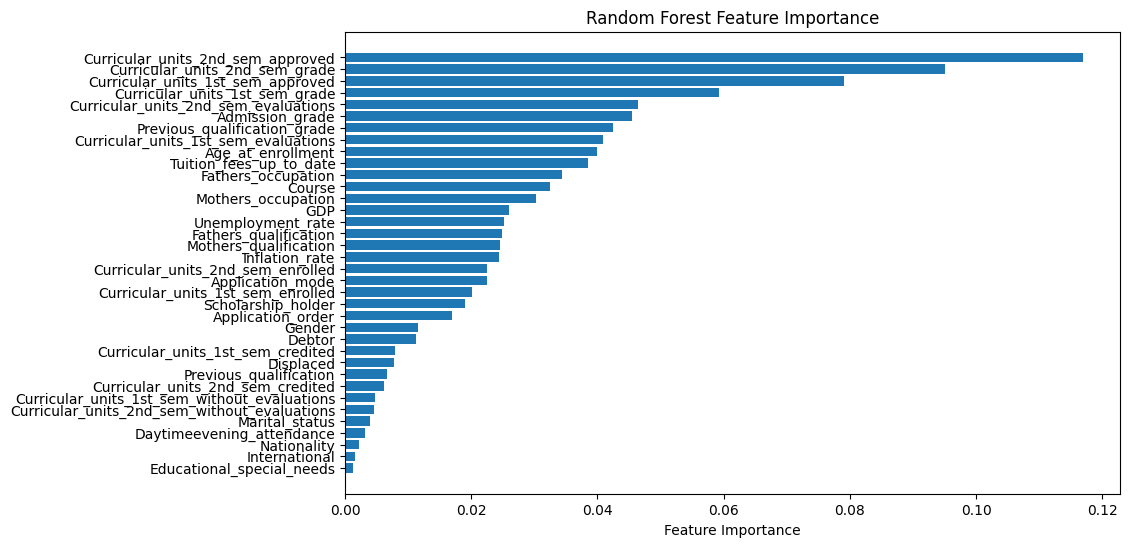

In [45]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=2)
random_forest_model.fit(X_train, y_train)
importances = random_forest_model.feature_importances_
features = X_train.columns

# Sort features by importance
sorted_indices = importances.argsort()
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances[sorted_indices], align='center')
plt.yticks(range(len(importances)), features[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

# Conclusion

The analysis identified key factors influencing student outcomes, with "Curricular units 2nd sem approved" (Score: 2110.25) and "1st sem grade" (Score: 973.41) being the most significant predictors. Random Forest achieved the highest performance, with an accuracy of 83% and F1 Score of 84%, effectively classifying student statuses. SMOTE oversampling balanced the dataset (2209 samples per class), improving model reliability. Visualizations highlighted that students with admission grades above 140 were more likely to graduate, while those below 120 had higher dropout rates. These findings emphasize the importance of academic and financial support to enhance graduation rates.